C:\Users\Manas\AppData\Local\Temp\ipykernel_2332\1224744603.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='Set2')


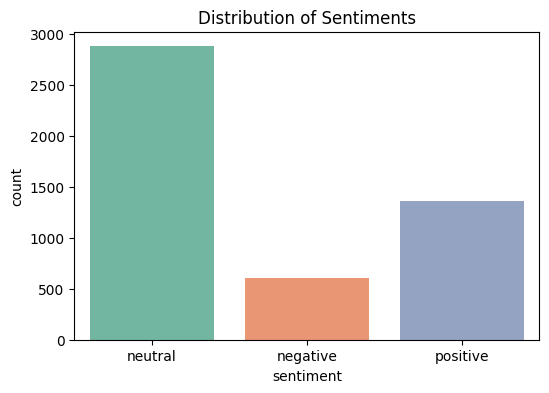

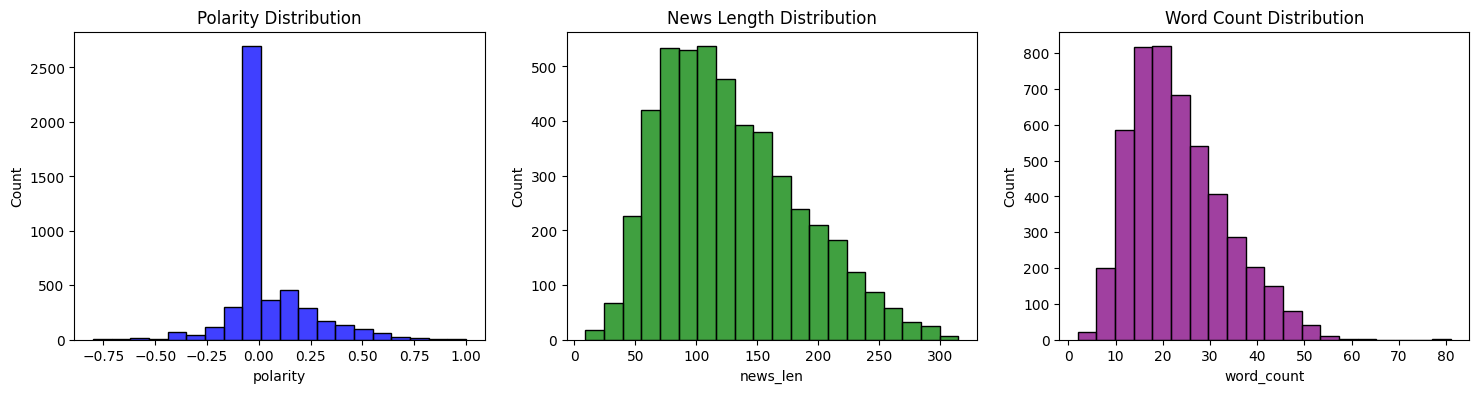

Mean Squared Error (Regression): 0.277866510704791


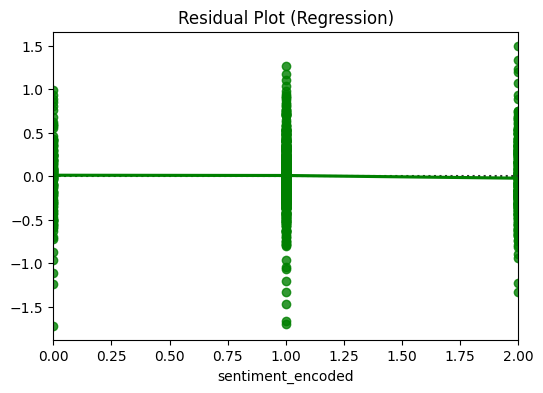

Accuracy (KNN): 0.5593395252837977


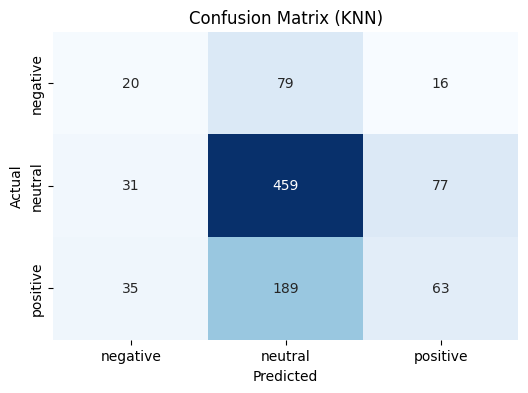

Accuracy (Decision Tree): 0.6480908152734778


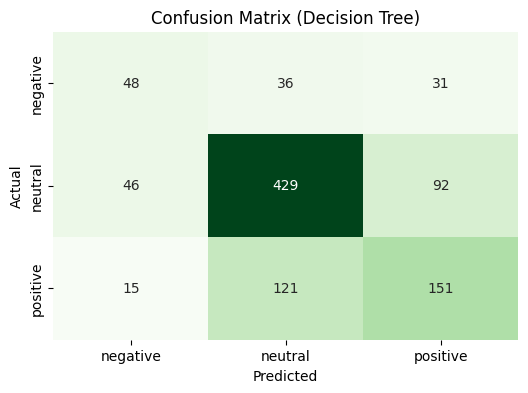

Mean Squared Error (Regression): 0.277866510704791
Accuracy (KNN): 0.5593395252837977
Accuracy (Decision Tree): 0.6480908152734778


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from textblob import TextBlob

# Load dataset from the absolute path
file_path = '../data/pre-processed-data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Renaming columns for clarity (modify based on actual column names)
data.columns = ['sentiment', 'news']

# Check for missing values and fill them
data = data.dropna()

# Feature Engineering: Calculate Polarity, News Length, and Word Count
data['polarity'] = data['news'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['news_len'] = data['news'].apply(len)
data['word_count'] = data['news'].apply(lambda x: len(x.split()))

# Encode the sentiment labels
le = LabelEncoder()
data['sentiment_encoded'] = le.fit_transform(data['sentiment'])

# Vectorize the news text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(data['news']).toarray()

# Combine text features (TF-IDF) with numerical features (polarity, news_len, word_count)
X = np.hstack((X_text, data[['polarity', 'news_len', 'word_count']].values))
y = data['sentiment_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# --- PLOTS AND GRAPHS ---

# 1. Plot the distribution of sentiment
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Distribution of Sentiments')
plt.show()

# 2. Plot the distribution of polarity, news length, and word count
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
sns.histplot(data['polarity'], bins=20, ax=ax[0], color='blue')
ax[0].set_title('Polarity Distribution')
sns.histplot(data['news_len'], bins=20, ax=ax[1], color='green')
ax[1].set_title('News Length Distribution')
sns.histplot(data['word_count'], bins=20, ax=ax[2], color='purple')
ax[2].set_title('Word Count Distribution')
plt.show()

# --- REGRESSION MODEL ---
# Train a regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions and evaluation for regression
y_pred_reg = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error (Regression): {mse}")

# Residual Plot for Regression
plt.figure(figsize=(6, 4))
sns.residplot(x=y_test, y=y_pred_reg, lowess=True, color="g")
plt.title('Residual Plot (Regression)')
plt.show()

# --- KNN MODEL ---
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation for KNN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn}")

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- DECISION TREE MODEL ---
# Train Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy (Decision Tree): {accuracy_tree}")

# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- SUMMARY ---
print(f"Mean Squared Error (Regression): {mse}")
print(f"Accuracy (KNN): {accuracy_knn}")
print(f"Accuracy (Decision Tree): {accuracy_tree}")